### IMPORT

In [ ]:
# %matplotlib notebook

In [85]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
file_mouse = os.path.join("Resources","Mouse_metadata.csv")
file_study = os.path.join("Resources","Study_results.csv")

In [4]:
df_m = pd.read_csv(file_mouse)
df_m.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
df_s = pd.read_csv(file_study)
df_s.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
print(df_s.shape,df_m.shape)

(1893, 4) (249, 5)


### CHECK and REMOVE Duplicates

In [7]:
df_s[df_s.duplicated()]
df_sd = df_s.drop_duplicates()




In [8]:
df_sd.duplicated().sum()

0

### MERGE ON MOUSE ID

In [9]:
df = pd.merge(df_m,df_sd, on ='Mouse ID')

In [10]:
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
df.shape

(1892, 8)

### Checking for Duplicate Values

In [12]:
df.duplicated().sum()

0

### Checking for null values

In [13]:
df.isnull().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [14]:
df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,12.810254,25.662262,19.582452,50.451260,1.022199
std,7.189027,3.922652,14.075984,8.896191,1.138032
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.954697,1.000000
75%,20.000000,29.000000,30.000000,56.298917,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


### Generating Summary Statistics Table

In [15]:
g_reg = df.groupby(['Drug Regimen'])

In [16]:
reg_mean = g_reg['Tumor Volume (mm3)'].mean()

In [17]:
reg_median = g_reg['Tumor Volume (mm3)'].median()

In [18]:
reg_var = g_reg['Tumor Volume (mm3)'].var()

In [19]:
reg_std = g_reg['Tumor Volume (mm3)'].std()

In [20]:
reg_sem = g_reg['Tumor Volume (mm3)'].sem()

In [21]:
summary = pd.DataFrame({"Mean (mm3)": reg_mean,"Medain (mm3)":reg_median, "Variance (mm3)": reg_var,"Std.Deviation (mm3)": reg_std,"SEM (mm3)":reg_sem})

In [22]:
summary

,Mean (mm3),Medain (mm3),Variance (mm3),Std.Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
summary2= pd.DataFrame({"Mean (mm3)": g_reg['Tumor Volume (mm3)'].mean(),"Median (mm3)": g_reg['Tumor Volume (mm3)'].median(),"Variance (mm3)":g_reg['Tumor Volume (mm3)'].var(),"Std.Deviation (mm3)":g_reg['Tumor Volume (mm3)'].std(),"SEM (mm3)":g_reg['Tumor Volume (mm3)'].sem()})


In [24]:
summary2

,Mean (mm3),Median (mm3),Variance (mm3),Std.Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Total Mice for each treatment regimen

In [25]:
axis_series = g_reg['Mouse ID'].count()
axis_series.sort_index()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [26]:
s = df['Drug Regimen'].unique()

ll = np.arange(len(axis_series))

In [27]:
s=np.sort(s)
s

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

### Using pyplot

([<matplotlib.axis.XTick at 0x22cf4f92080>,
 <a list of 10 Text xticklabel objects>)

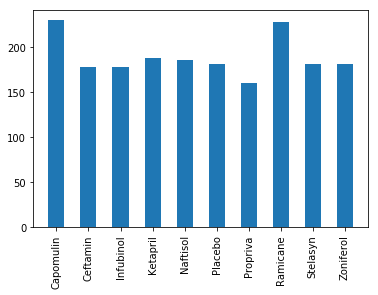

In [28]:

figure=plt.bar(ll,axis_series,width=0.5)
plt.xticks(ll,s,rotation =90)

### Using Pandas

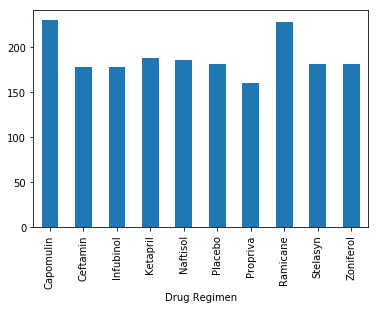

In [29]:

axis_series.plot(kind='bar',label ='Total Mice')


### Male vs Female Count using Pandas

In [30]:
grp_sex =df.groupby(['Sex']).count()

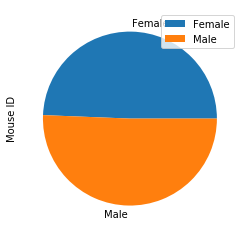

In [31]:
grp_sex.plot.pie('Mouse ID')

### Male vs Female using Matplotlib

([<matplotlib.patches.Wedge at 0x22cf5367320>,
 [Text(0.021916657774508554, 1.099781642014448, 'Female'),
  Text(-0.021916760743497157, -1.0997816399624576, 'Male')])

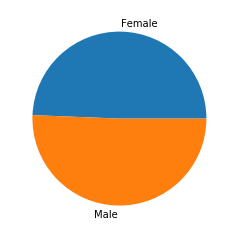

In [32]:
plt.pie(grp_sex['Mouse ID'],labels=['Female','Male'])


### Final Tumor Volume

In [33]:
ids = df.groupby(['Mouse ID'])['Timepoint'].max()


In [34]:
ids

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
a401    45
a411    45
a444    45
a457    10
a492    45
a520    45
a577    30
a644    45
a685    45
a699    45
a788    30
a818    45
a897    45
a963    45
b128    45
b313    25
b447     0
b487    25
b559    45
b742    45
b759    30
b879    45
c139    45
c264    45
c282    45
        ..
w697    35
w746     5
w914    45
x111    10
x209    10
x226     0
x264    40
x336     0
x401    45
x402    45
x581    45
x613    15
x773    45
x822    45
x930    25
y163    45
y260    45
y449    15
y478    45
y601     5
y769    45
y793    45
y865    45
z234     5
z314     5
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [35]:
df_int = pd.DataFrame({'Timepoint':ids})

In [36]:
df_merge=pd.merge(df,df_int,on=['Mouse ID','Timepoint'])

In [37]:
df_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
6,f966,Capomulin,Male,16,17,20,30.485985,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0
9,j913,Ramicane,Female,4,17,45,31.560470,1


In [38]:
drugs=['Ramicane','Capomulin','Infubinol','Ceftamin']

In [39]:
df_drugs=df_merge[df_merge['Drug Regimen'].isin(drugs)]

In [106]:
df_drugs['Mouse ID'].nunique()

100

In [40]:
tumor_vol=[]
for ind,row in df_drugs.iterrows():
    tumor_vol.append(row['Tumor Volume (mm3)'])
    

In [116]:
df_capo1=df[df['Drug Regimen']=='Capomulin']
df_ramicine=df[df['Drug Regimen']=='Ramicane']
df_infu=df[df['Drug Regimen']=='Infubinol']
df_cefta=df[df['Drug Regimen']=='Ceftamin']

In [117]:
tvcapo=df_capo1['Tumor Volume (mm3)']
tvr=df_ramicine['Tumor Volume (mm3)']
tvi=df_infu['Tumor Volume (mm3)']
tvcefta=df_cefta['Tumor Volume (mm3)']

{'whiskers': [<matplotlib.lines.Line2D at 0x22cf8da30b8>,
 'caps': [<matplotlib.lines.Line2D at 0x22cf8d9e898>,
 'boxes': [<matplotlib.lines.Line2D at 0x22cf8da3eb8>,
 'medians': [<matplotlib.lines.Line2D at 0x22cf8d9ea20>,
 'fliers': [<matplotlib.lines.Line2D at 0x22cf8d9ed68>,
 'means': []}

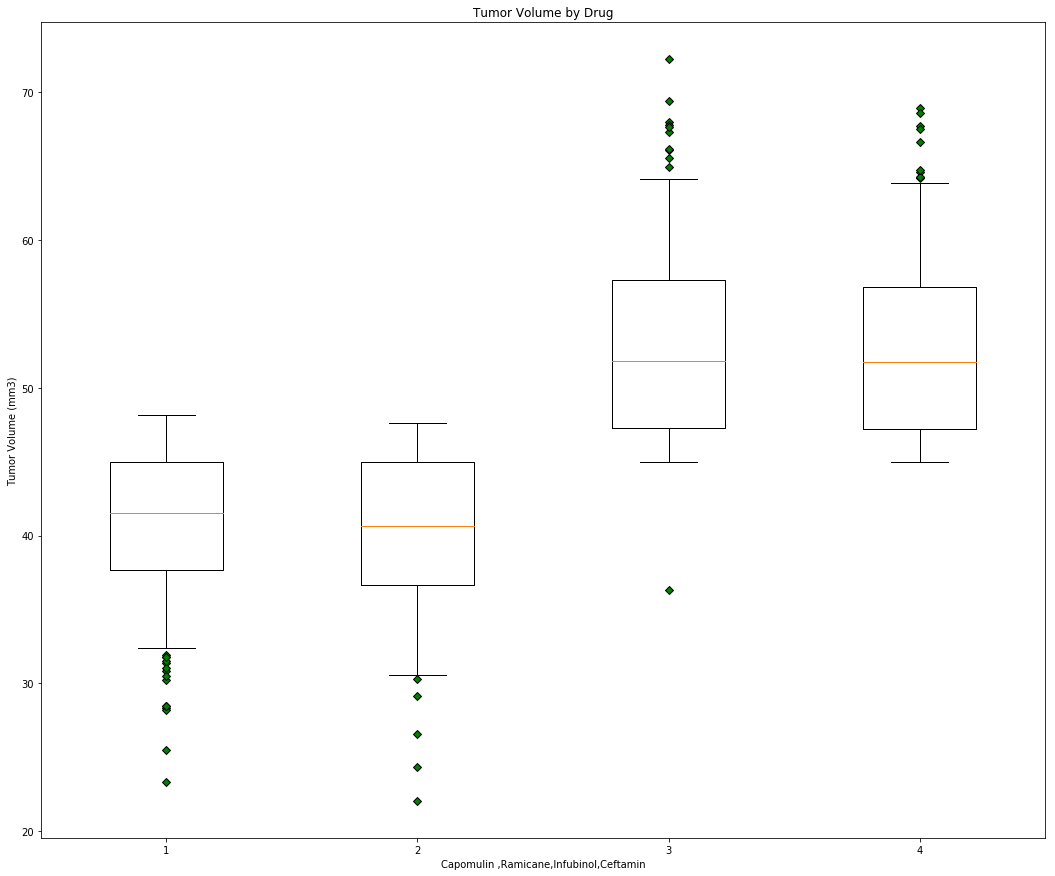

In [134]:

green_diamond=dict(markerfacecolor='g',marker='D')
data=[tvcapo,tvr,tvi,tvcefta]
x,y=plt.subplots(figsize=(18,15))
plt.xlabel('Capomulin ,Ramicane,Infubinol,Ceftamin')
plt.ylabel('Tumor Volume (mm3)')


y.set_title('Tumor Volume by Drug')
y.boxplot(data,flierprops=green_diamond,whis=0.75)


### Determining IQR

In [47]:
print(lower_bound,upper_bound)

3.0739668737499812 94.04403868375002


In [48]:
outliers=tum_voldf.loc[(tum_voldf<lower_bound) | (tum_voldf>upper_bound)]
outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [49]:
len(outliers)

0

### Line and Scatter

In [50]:
df_capo=df[df['Drug Regimen']=='Capomulin']

In [139]:
df_capo1mouse = df_capo[df_capo['Mouse ID']=='s185']

In [140]:
df_capo1mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


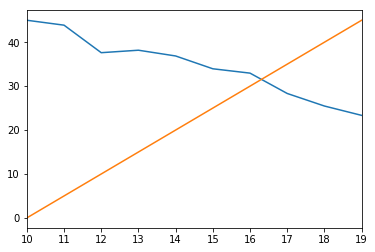

In [142]:

df_capo1mouse['Tumor Volume (mm3)'].plot.line()
df_capo1mouse['Timepoint'].plot.line(x='Timepoint')

In [52]:
avg_capo = df_capo.groupby('Mouse ID')

In [56]:
mean_tumor=avg_capo['Tumor Volume (mm3)'].mean()

In [59]:
df_capo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [62]:
weight=avg_capo['Weight (g)']

In [68]:
wts=weight.unique()

In [80]:
stat_df=pd.DataFrame({"Weight":wts,"Avg_Tumor":mean_tumor})

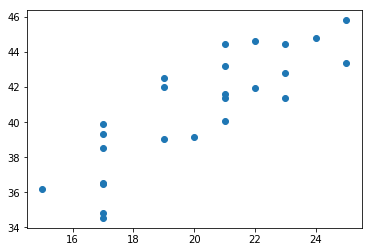

In [81]:
plt.scatter(stat_df['Weight'],stat_df['Avg_Tumor'])

### Correlation and Regression

In [82]:
weights = stat_df['Weight']
at=stat_df['Avg_Tumor']

In [83]:
corr = sts.pearsonr(weights,at)

In [84]:
corr

(array([0.84116671]), array([1.39298626e-07]))

In [89]:
type(weights)

pandas.core.series.Series

In [91]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(weights.astype(float),at.astype(float))

In [92]:
regress_values = weights*slope +intercept

In [95]:
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

In [96]:
line_eq

'y = 0.95x + 21.55'

Text(0, 0.5, 'Avg Tumor Vol.')

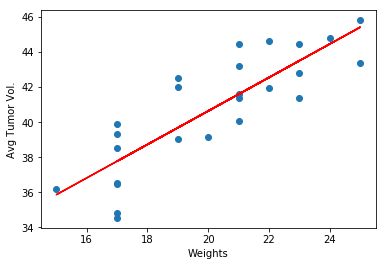

In [103]:
plt.scatter(weights,at)
plt.plot(weights,regress_values,"red")

plt.xlabel('Weights')
plt.ylabel('Avg Tumor Vol.')

In [104]:
rvalue**2

0.7088568047708717